In [12]:
# EXPLORATORY DATA ANALYSIS: INDIAN STARTUP INVESTMENTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pathlib import Path  # using pathlib instead of plain strings for paths

# Try to import an enhanced dataframe viewer (if available in the environment)
try:
    from ace_tools import display_dataframe_to_user
except Exception:
    display_dataframe_to_user = None

In [13]:
# DATA LOADING

# data file path
DATA_PATH = Path("/content") / "Indian_Startup_Investment_Trends.csv"

# Collect read_csv options
read_options = {
    "low_memory": False,   # ensures more stable dtype inference
}

# Read the CSV
df = pd.read_csv(DATA_PATH, **read_options)

print(f"File loaded from: {DATA_PATH}")
print("Initial dataset shape (rows, columns):", df.shape)

if display_dataframe_to_user is not None:
    display_dataframe_to_user("Dataset preview (first 10 rows)", df.head(10))
else:
    print("\n--- Dataset preview (first 10 rows) ---")
    display(df.head(10))

File loaded from: /content/Indian_Startup_Investment_Trends.csv
Initial dataset shape (rows, columns): (12428, 32)

--- Dataset preview (first 10 rows) ---


,Startup_ID,Name,Sector,Sub-Sector,City,State,Founded_Year,Founder_Name,Funding_Stage,Investment_Type,Amount_Raised,Investors_Count,Lead_Investor,Co-Investors,Valuation_Post_Funding,Revenue,Profitability,Number_of_Employees,Tech_Stack,Primary_Product,Customer_Base_Size,Growth_Rate,Exit_Status,Acquisition_Details,Funding_Date,Pitch_Deck_Link,Social_Media_Followers,Competitors,Patents,ESG_Score,Diversity_Index,Net_Impact_Score
0,a713cd4f,Startup_0,Retail,Sub_2,Pune,Maharashtra,2022,Founder_356,Series D,Grant,6523237,9,Investor_75,Investor_566,24886076,1263794,No,326,IoT,Product_3,92170,9.66,No,NaN,2023-07-08,http://example.com/pitchdeck/0,27648,Competitor_88,11,5.32,39.33,4.71
1,b75f6987,Startup_1,EdTech,Sub_2,Pune,Karnataka,2019,Founder_93,IPO,Convertible Note,5757470,7,Investor_409,Investor_543,83153668,4324863,Yes,421,AR/VR,Product_18,82497,13.93,Yes,Acquirer_185,2017-01-02,http://example.com/pitchdeck/1,89143,Competitor_66,17,2.50,43.19,5.03
2,d5ba7ec2,Startup_2,AgriTech,Sub_7,Chennai,Tamil Nadu,2010,Founder_951,Series A,Grant,9611115,6,Investor_360,Investor_768,86184749,2185306,No,388,Blockchain,Product_23,97421,16.17,Yes,NaN,2022-06-20,http://example.com/pitchdeck/2,62445,Competitor_93,4,5.13,36.11,5.71
3,5190a643,Startup_3,HealthTech,Sub_8,Mumbai,Telangana,2007,Founder_538,IPO,Debt,8103826,6,Investor_375,Investor_534,27973070,4709714,No,166,Blockchain,Product_21,41892,9.79,Yes,NaN,2021-01-11,http://example.com/pitchdeck/3,30184,Competitor_31,13,9.14,31.38,9.29
4,a6801a40,Startup_4,HealthTech,Sub_6,Bangalore,Maharashtra,2019,Founder_69,Seed,Grant,223670,1,Investor_455,Investor_902,54855828,1655812,Yes,455,IoT,Product_9,58855,45.94,No,NaN,2015-07-22,http://example.com/pitchdeck/4,56494,Competitor_27,0,8.10,78.20,1.12
5,28af737a,Startup_5,TravelTech,Sub_1,Chennai,Tamil Nadu,2022,Founder_665,Series A,Grant,7020554,8,Investor_426,Investor_567,60749788,2630764,Yes,417,AR/VR,Product_9,13564,23.98,Yes,NaN,2023-03-19,http://example.com/pitchdeck/5,47982,Competitor_60,19,5.87,75.13,8.35
6,e745a938,Startup_6,FoodTech,Sub_4,Bangalore,Delhi,2018,Founder_399,Seed,Debt,1117911,5,Investor_72,Investor_845,90432670,425008,No,371,Big Data,Product_25,11719,24.83,Yes,Acquirer_415,2017-02-18,http://example.com/pitchdeck/6,5660,Competitor_94,2,6.06,61.46,2.06
7,e15a0b56,Startup_7,TravelTech,Sub_8,Delhi,Maharashtra,2006,Founder_497,Series D,Equity,3110203,1,Investor_348,Investor_991,87168503,393062,No,111,AI,Product_24,43137,25.45,Yes,NaN,2018-09-12,http://example.com/pitchdeck/7,95116,Competitor_90,12,8.90,74.67,3.09
8,7eda3996,Startup_8,Retail,Sub_2,Bangalore,Maharashtra,2008,Founder_875,Seed,Convertible Note,1859879,9,Investor_81,Investor_510,23181984,343903,No,173,Blockchain,Product_8,56872,19.09,Yes,Acquirer_847,2018-05-25,http://example.com/pitchdeck/8,90686,Competitor_59,20,9.80,44.77,6.37
9,34ba9cef,Startup_9,HealthTech,Sub_5,Bangalore,Tamil Nadu,2018,Founder_489,Series A,Debt,1384039,3,Investor_51,Investor_867,67588657,4104649,Yes,260,Big Data,Product_4,32591,32.96,No,NaN,2019-12-17,http://example.com/pitchdeck/9,28830,Competitor_36,17,6.50,22.37,8.01


In [14]:
# DATAFRAME OVERVIEW AND BASIC STATISTICS

print("\n--- DataFrame info ---")
print("This shows the column names, counts of non-null values, and datatypes.")
info_result = df.info()   # df.info() already prints; we store just to keep behavior similar
print(info_result)

print("\n--- Descriptive statistics for numeric features ---")
# numeric columns are summarized
display(df.describe(include=[np.number]).T)

print("\n--- Descriptive statistics for object (categorical-like) features ---")
# object / string columns summarized
display(df.describe(include=['object']).T)


--- DataFrame info ---
This shows the column names, counts of non-null values, and datatypes.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup_ID              12428 non-null  object 
 1   Name                    12428 non-null  object 
 2   Sector                  12428 non-null  object 
 3   Sub-Sector              12428 non-null  object 
 4   City                    12428 non-null  object 
 5   State                   12428 non-null  object 
 6   Founded_Year            12428 non-null  int64  
 7   Founder_Name            12428 non-null  object 
 8   Funding_Stage           12428 non-null  object 
 9   Investment_Type         12428 non-null  object 
 10  Amount_Raised           12428 non-null  int64  
 11  Investors_Count         12428 non-null  int64  
 12  Lead_Investor           12428 non-null  object 
 

,count,mean,std,min,25%,50%,75%,max
Founded_Year,12428.0,2.011548e+03,6.874311e+00,2000.0,2006.00,2.012000e+03,2.018000e+03,2023.00
Amount_Raised,12428.0,5.022741e+06,2.859508e+06,100101.0,2550872.00,5.031528e+06,7.511476e+06,9998407.00
Investors_Count,12428.0,5.497103e+00,2.858551e+00,1.0,3.00,6.000000e+00,8.000000e+00,10.00
Valuation_Post_Funding,12428.0,5.037858e+07,2.854335e+07,1018160.0,25274100.75,5.048611e+07,7.518947e+07,99991036.00
Revenue,12428.0,2.530078e+06,1.409488e+06,100013.0,1306538.25,2.517865e+06,3.737343e+06,4999381.00
Number_of_Employees,12428.0,2.564606e+02,1.406301e+02,10.0,135.00,2.560000e+02,3.770000e+02,500.00
Customer_Base_Size,12428.0,5.046486e+04,2.861671e+04,1004.0,25544.00,5.030550e+04,7.505275e+04,99994.00
Growth_Rate,12428.0,2.743367e+01,1.289802e+01,5.0,16.36,2.735500e+01,3.844000e+01,50.00
Social_Media_Followers,12428.0,5.064260e+04,2.851803e+04,1008.0,25872.75,5.043500e+04,7.553175e+04,99963.00
Patents,12428.0,9.904731e+00,6.103485e+00,0.0,5.00,1.000000e+01,1.500000e+01,20.00



--- Descriptive statistics for object (categorical-like) features ---


,count,unique,top,freq
Startup_ID,12428,12428,1d0384ad,1
Name,12428,12428,Startup_12427,1
Sector,12428,7,FinTech,1832
Sub-Sector,12428,10,Sub_2,1318
City,12428,6,Bangalore,2154
State,12428,5,Delhi,2532
Founder_Name,12428,1000,Founder_625,28
Funding_Stage,12428,6,Series A,2098
Investment_Type,12428,4,Convertible Note,3161
Lead_Investor,12428,500,Investor_399,40


In [15]:
# MISSING VALUES AND UNIQUE COUNTS

# Count missing values column-wise and sort
missing_counts = df.isna().sum().sort_values(ascending=False)
print("\n--- Missing values per column (only columns with at least 1 missing) ---")
display(missing_counts[missing_counts > 0])

# Unique value counts for object columns
print("\n--- Top 10 object columns by number of unique values ---")
obj_unique_counts = (
    df.select_dtypes(include=['object'])
      .nunique()
      .sort_values(ascending=False)
)
display(obj_unique_counts.head(10))


--- Missing values per column (only columns with at least 1 missing) ---


,0
Acquisition_Details,10027



--- Top 10 object columns by number of unique values ---


,0
Startup_ID,12428
Name,12428
Pitch_Deck_Link,12428
Funding_Date,2976
Founder_Name,1000
Acquisition_Details,913
Lead_Investor,500
Co-Investors,500
Competitors,100
Primary_Product,50


In [16]:
# DETECT IMPORTANT COLUMNS HEURISTICALLY

lower_to_original = {col.lower(): col for col in df.columns}

def detect_column(possible_names):
    """
    Return the original column name if any of the possible_names
    is present (in lowercase) in the DataFrame columns.
    Otherwise return None.
    """
    for candidate in possible_names:
        if candidate in lower_to_original:
            return lower_to_original[candidate]
    return None

# Try to detect semantically important columns by typical names
date_col    = detect_column(['date', 'funding_date', 'funded_on', 'investment_date'])
year_col    = detect_column(['year', 'funding_year'])
amount_col  = detect_column(['amount_usd', 'amount', 'raised_amount',
                             'funding_amount', 'investment_amount', 'amount_in_usd'])
startup_col = detect_column(['startup', 'company', 'startup_name', 'name'])
investor_col= detect_column(['investors', 'investor', 'lead_investor'])
sector_col  = detect_column(['sector', 'vertical', 'industry', 'category'])

print("\n--- Detected columns (None means not found) ---")
print("date_col   :", date_col)
print("year_col   :", year_col)
print("amount_col :", amount_col)
print("startup_col:", startup_col)
print("investor_col:", investor_col)
print("sector_col :", sector_col)



--- Detected columns (None means not found) ---
date_col   : Funding_Date
year_col   : None
amount_col : None
startup_col: Name
investor_col: Lead_Investor
sector_col : Sector


In [17]:
# DATE PARSING

def safe_parse_date(value):
    """
    Attempt to convert different textual date formats to a proper Timestamp.
    If parsing fails, return NaT (Not-a-Time).
    """
    if pd.isna(value):
        return pd.NaT

    # If the value is already a datetime-like object, convert directly
    if isinstance(value, (pd.Timestamp, datetime)):
        return pd.to_datetime(value)

    s = str(value).strip()

    # Try several common date formats explicitly
    candidate_formats = [
        "%Y-%m-%d",
        "%d-%m-%Y",
        "%d/%m/%Y",
        "%m/%d/%Y",
        "%b %d, %Y",
        "%d %b %Y",
        "%Y",
    ]
    for fmt in candidate_formats:
        try:
            return pd.to_datetime(s, format=fmt)
        except Exception:
            continue

    # As a last resort, let pandas infer the format
    return pd.to_datetime(s, infer_datetime_format=True, errors="coerce")

# Create a parsed date column (same name as before: '_parsed_date')
if date_col is not None:
    df["_parsed_date"] = df[date_col].apply(safe_parse_date)
else:
    # If no date column found, still create the column with NaT
    df["_parsed_date"] = pd.NaT

In [18]:
# YEAR COLUMN CREATION


# If a 'year' column does not already exist, we either:
#   - reuse an explicit year-like column, or
#   - extract the year from the parsed date.
if "year" not in df.columns:
    if year_col is not None:
        df["year"] = pd.to_numeric(df[year_col], errors="coerce").astype("Int64")
    else:
        df["year"] = df["_parsed_date"].dt.year.astype("Int64")

In [19]:
# 4C. CLEANING UP FUNDING AMOUNTS
# ============================================================

def normalize_amount(series):
    """
    Take a Series of raw funding strings and convert to float values.
    Steps:
        - cast to string
        - remove commas and currency symbols
        - drop unit labels like 'INR', 'USD', 'crore', 'lakh', etc.
        - handle 'M' and 'K' suffixes (e.g., '1.5M', '200K')
        - return float or NaN
    """
    if series is None:
        # Return all-NaN if column is missing
        return pd.Series([np.nan] * len(df))

    # Start with a string-cleaned version
    cleaned = series.astype(str)
    cleaned = cleaned.str.replace(r",", "", regex=True)          # Remove commas
    cleaned = cleaned.str.replace(r"[\$\£\€₹]", "", regex=True)  # Remove currency symbols
    cleaned = cleaned.str.replace(
        r"(?i)(inr|usd|rs\.?|crore|crores|lakh|lakhs|cr|cr\.)",
        "",
        regex=True,
    )

    def parse_one(x):
        txt = str(x).strip().lower()

        # handle blanks / null-like tokens
        if txt == "" or txt in {"nan", "none", "na", "n/a"}:
            return np.nan

        # handle shorthand multipliers
        if txt.endswith("m"):  # e.g. 2.5m = 2.5 * 1e6
            try:
                return float(txt[:-1]) * 1e6
            except Exception:
                return np.nan
        if txt.endswith("k"):  # e.g. 500k = 500 * 1e3
            try:
                return float(txt[:-1]) * 1e3
            except Exception:
                return np.nan

        # default case: interpret as raw float
        try:
            return float(txt)
        except Exception:
            return np.nan

    return cleaned.apply(parse_one)

# If we have an explicit amount column, clean that.
if amount_col is not None:
    df["_amount_raw"] = df[amount_col]
    df["amount_usd_approx"] = normalize_amount(df[amount_col])
else:
    # Otherwise, heuristically pick a numeric column that looks like an amount.
    numeric_candidate = None
    for col in df.columns:
        if df[col].dtype.kind in "fi":  # float or int
            # heuristic: median > 1000 likely means "large" value like an amount
            median_val = df[col].median()
            if pd.notna(median_val) and median_val > 1000:
                numeric_candidate = col
                break

    if numeric_candidate is not None:
        df["_amount_raw"] = df[numeric_candidate]
        df["amount_usd_approx"] = pd.to_numeric(df[numeric_candidate], errors="coerce")
    else:
        df["_amount_raw"] = np.nan
        df["amount_usd_approx"] = np.nan

print("\n--- Funding amount cleaning summary ---")
print("Non-null in raw amount column :", df["_amount_raw"].notna().sum())
print("Non-null in parsed amount column:", df["amount_usd_approx"].notna().sum())


--- Funding amount cleaning summary ---
Non-null in raw amount column : 12428
Non-null in parsed amount column: 12428


In [20]:
# SUMMARY TABLES

print("\n--- Year-wise summary: rounds, total funding, median funding ---")
year_summary = (
    df.groupby("year", dropna=True)
      .agg(
          rounds=("year", "count"),
          total_funding=("amount_usd_approx", "sum"),
          median_funding=("amount_usd_approx", "median"),
      )
      .reset_index()
      .sort_values("year")
)
display(year_summary.head(30))

# Top startups by total funding (if we detected a startup column)
if startup_col is not None:
    print("\n--- Top 15 startups by total funding ---")
    top_startups = (
        df.groupby(startup_col)
          .agg(
              total_funding=("amount_usd_approx", "sum"),
              rounds=(startup_col, "count"),
          )
          .sort_values("total_funding", ascending=False)
          .head(15)
    )
    display(top_startups)
else:
    print("\nNo startup/company column detected.")

# Top sectors by number of rounds (if we have a sector column)
if sector_col is not None:
    print("\n--- Top 20 sectors by number of rounds ---")
    top_sectors = (
        df.groupby(sector_col)
          .agg(
              rounds=(sector_col, "count"),
              total_funding=("amount_usd_approx", "sum"),
          )
          .sort_values("rounds", ascending=False)
          .head(20)
    )
    display(top_sectors)
else:
    print("\nNo sector column detected.")

# Top investors by number of mentions (if investor column detected)
if investor_col is not None:
    print("\n--- Top 20 investors by mention frequency ---")
    # Convert to string, drop NaNs
    investor_strings = df[investor_col].dropna().astype(str)

    # Split on various separators and clean whitespace
    split_series = investor_strings.str.split(
        r",|;|/|\band\b|\|",  # handle commas, semicolons, 'and', slashes, pipes
        regex=True,
    ).apply(lambda lst: [x.strip() for x in lst if x and x.strip()])

    # Flatten the list of lists to a single Series of investor names
    investor_flat = split_series.explode()

    # Count frequency and show the top 20
    inv_counts = investor_flat.value_counts().head(20)
    display(inv_counts)
else:
    inv_counts = None
    print("\nNo investor column detected.")


--- Year-wise summary: rounds, total funding, median funding ---


,year,rounds,total_funding,median_funding
0,2015,1353,2721603,2012.0
1,2016,1370,2756105,2012.0
2,2017,1383,2781800,2011.0
3,2018,1349,2713373,2012.0
4,2019,1372,2759866,2012.0
5,2020,1422,2860347,2012.0
6,2021,1398,2812342,2012.0
7,2022,1373,2762024,2012.0
8,2023,1408,2832061,2012.0



--- Top 15 startups by total funding ---


,total_funding,rounds
Name,,
Startup_1005,2023,1
Startup_771,2023,1
Startup_10020,2023,1
Startup_9400,2023,1
Startup_9988,2023,1
Startup_7693,2023,1
Startup_10894,2023,1
Startup_10891,2023,1
Startup_10888,2023,1



--- Top 20 sectors by number of rounds ---


,rounds,total_funding
Sector,,
FinTech,1832,3685067
TravelTech,1786,3592588
AgriTech,1783,3587005
Retail,1777,3574398
HealthTech,1771,3562482
FoodTech,1762,3544453
EdTech,1717,3453528



--- Top 20 investors by mention frequency ---


,count
Lead_Investor,
Investor_399,40
Investor_203,39
Investor_408,37
Investor_94,36
Investor_339,36
Investor_197,36
Investor_25,36
Investor_357,35
Investor_243,35



--- Missing value heatmap ---


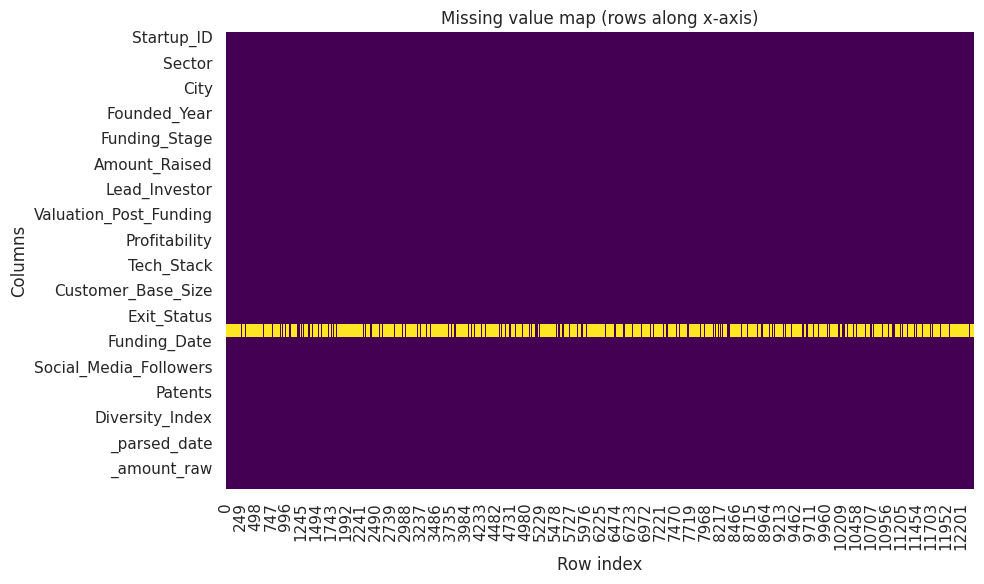

In [21]:
# VISUALIZATIONS

# Ensure inline plotting
get_ipython().run_line_magic("matplotlib", "inline")

sns.set(style="whitegrid")

# Missing value heatmap
print("\n--- Missing value heatmap ---")
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().astype(int).T, cbar=False, cmap="viridis")
plt.title("Missing value map (rows along x-axis)")
plt.xlabel("Row index")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()


--- Funding rounds and total funding over years ---


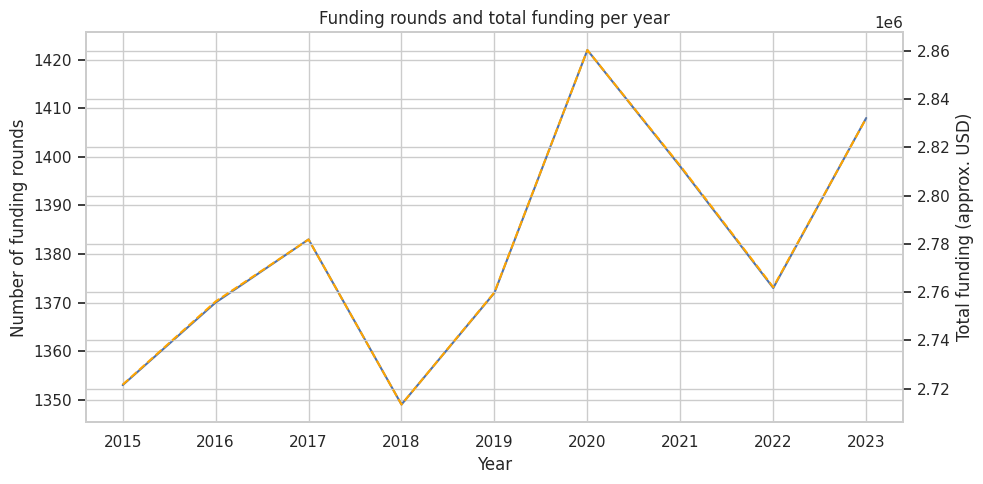

In [22]:
# Yearly funding trends (rounds vs total funding)
if not year_summary.empty:
    print("\n--- Funding rounds and total funding over years ---")
    fig, ax_left = plt.subplots(figsize=(10, 5))

    # Left axis: number of rounds per year
    sns.lineplot(data=year_summary, x="year", y="rounds", ax=ax_left)
    ax_left.set_ylabel("Number of funding rounds")
    ax_left.set_xlabel("Year")
    ax_left.set_title("Funding rounds and total funding per year")

    # Right axis: total funding per year
    ax_right = ax_left.twinx()
    sns.lineplot(
        data=year_summary,
        x="year",
        y="total_funding",
        ax=ax_right,
        color="orange",
        linestyle="--",
    )
    ax_right.set_ylabel("Total funding (approx. USD)")

    plt.tight_layout()
    plt.show()


--- Histogram of log10(funding amounts) ---


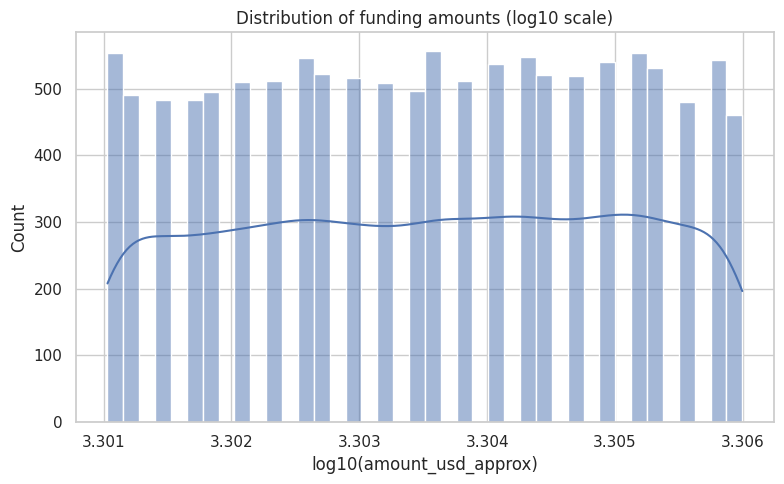

In [23]:
# Histogram of log10 funding amounts
valid_amounts = df["amount_usd_approx"].dropna()
if (valid_amounts > 0).any():
    print("\n--- Histogram of log10(funding amounts) ---")
    plt.figure(figsize=(8, 5))
    sns.histplot(np.log10(valid_amounts[valid_amounts > 0]), bins=40, kde=True)
    plt.xlabel("log10(amount_usd_approx)")
    plt.title("Distribution of funding amounts (log10 scale)")
    plt.tight_layout()
    plt.show()


--- Funding distributions for top 10 sectors ---


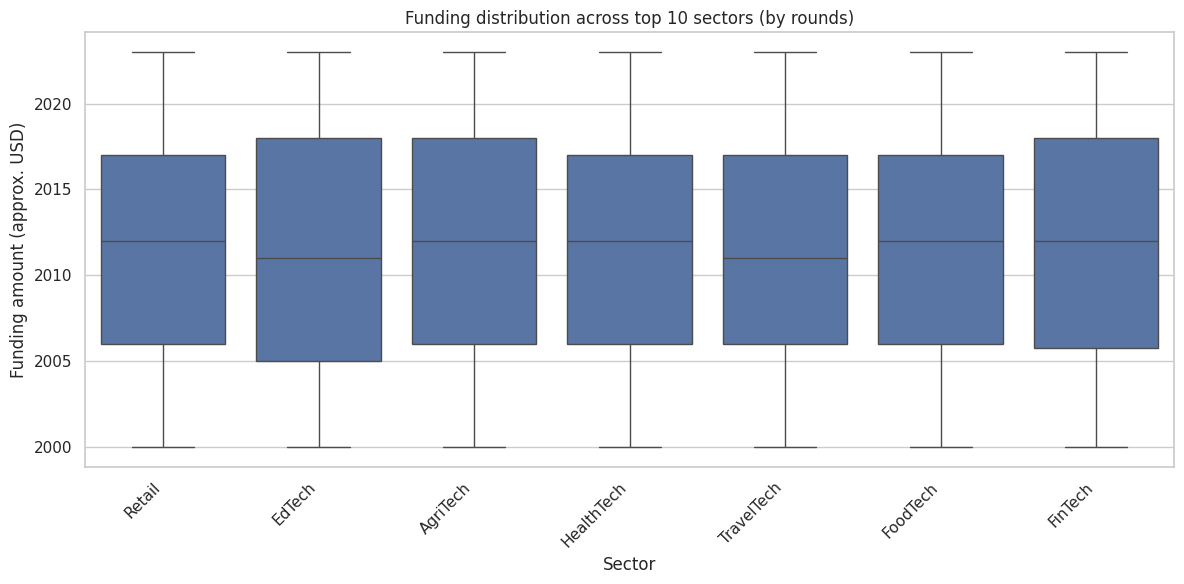

In [24]:
# Boxplot: funding distribution for top sectors
if sector_col is not None and not valid_amounts.empty:
    print("\n--- Funding distributions for top 10 sectors ---")
    top_sector_names = top_sectors.head(10).index.tolist()
    df_top_sec = df[df[sector_col].isin(top_sector_names)]

    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=df_top_sec,
        x=sector_col,
        y="amount_usd_approx",
        showfliers=False,
    )
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Funding amount (approx. USD)")
    plt.title("Funding distribution across top 10 sectors (by rounds)")
    plt.tight_layout()
    plt.show()


--- Top investors by mention count (bar chart) ---


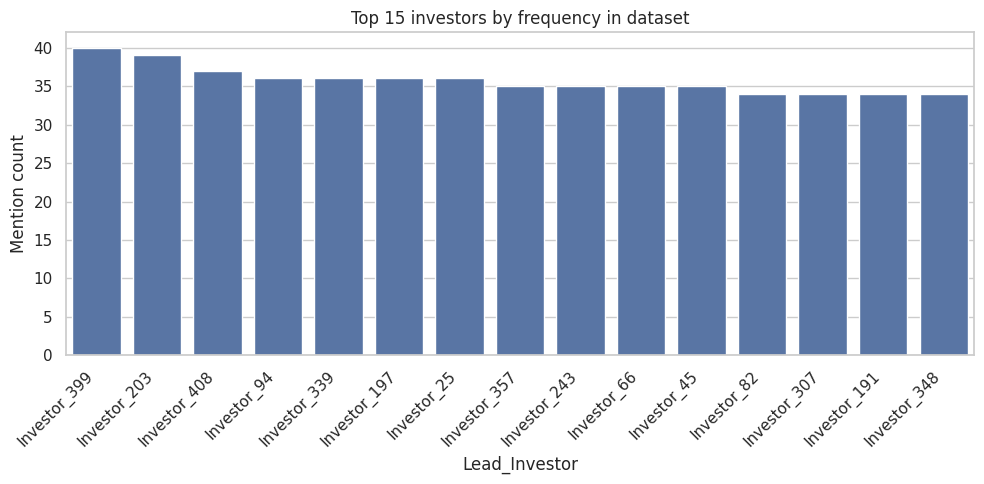

In [25]:
# Bar chart: top investors
if inv_counts is not None and not inv_counts.empty:
    print("\n--- Top investors by mention count (bar chart) ---")
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=inv_counts.head(15).index,
        y=inv_counts.head(15).values,
    )
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Mention count")
    plt.title("Top 15 investors by frequency in dataset")
    plt.tight_layout()
    plt.show()


--- Correlation matrix of numeric columns ---


,Founded_Year,Amount_Raised,Investors_Count,Valuation_Post_Funding,Revenue,Number_of_Employees,Customer_Base_Size,Growth_Rate,Social_Media_Followers,Patents,ESG_Score,Diversity_Index,Net_Impact_Score,year,_amount_raw,amount_usd_approx
Founded_Year,1.000000,-0.013915,-0.006387,0.001279,0.022343,0.000063,-0.000427,0.008704,-0.002743,-0.006507,0.004636,-0.003761,-0.013316,-0.000848,1.000000,1.000000
Amount_Raised,-0.013915,1.000000,0.007222,0.006165,-0.002018,0.004763,0.020200,-0.013708,-0.000423,0.000128,0.006098,-0.002224,0.002415,0.014017,-0.013915,-0.013915
Investors_Count,-0.006387,0.007222,1.000000,-0.004810,-0.000274,-0.000072,0.007650,-0.007470,0.001466,0.011072,-0.000931,-0.005467,-0.014427,0.004254,-0.006387,-0.006387
Valuation_Post_Funding,0.001279,0.006165,-0.004810,1.000000,-0.016600,0.019085,0.001109,-0.011151,-0.005296,0.005565,0.002415,0.003414,0.005507,0.011645,0.001279,0.001279
Revenue,0.022343,-0.002018,-0.000274,-0.016600,1.000000,0.008679,-0.006075,0.010941,-0.009333,0.005153,-0.004792,0.004533,0.012768,0.008339,0.022343,0.022343
Number_of_Employees,0.000063,0.004763,-0.000072,0.019085,0.008679,1.000000,0.015725,0.001790,0.004365,0.005120,0.008627,-0.001942,0.004567,-0.000412,0.000063,0.000063
Customer_Base_Size,-0.000427,0.020200,0.007650,0.001109,-0.006075,0.015725,1.000000,0.010133,0.020584,-0.014851,-0.008477,0.000116,-0.011655,-0.014569,-0.000427,-0.000427
Growth_Rate,0.008704,-0.013708,-0.007470,-0.011151,0.010941,0.001790,0.010133,1.000000,-0.010440,-0.000664,0.010274,0.016635,-0.009955,0.015435,0.008704,0.008704
Social_Media_Followers,-0.002743,-0.000423,0.001466,-0.005296,-0.009333,0.004365,0.020584,-0.010440,1.000000,-0.008999,-0.000513,-0.004925,-0.022282,0.005538,-0.002743,-0.002743
Patents,-0.006507,0.000128,0.011072,0.005565,0.005153,0.005120,-0.014851,-0.000664,-0.008999,1.000000,0.005978,-0.010069,0.003076,-0.015922,-0.006507,-0.006507


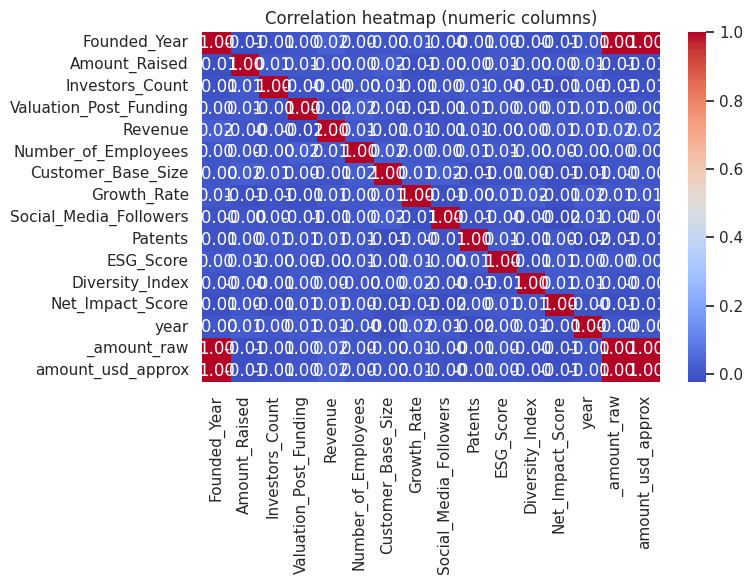

In [26]:
# CORRELATION ANALYSIS FOR NUMERIC COLUMNS

numeric_part = df.select_dtypes(include=[np.number])
if not numeric_part.empty:
    print("\n--- Correlation matrix of numeric columns ---")
    corr_matrix = numeric_part.corr()
    display(corr_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title("Correlation heatmap (numeric columns)")
    plt.tight_layout()
    plt.show()
else:
    print("\nNo numeric columns found; skipping correlation analysis.")

In [27]:
# SAVING CLEANED DATASET

OUTPUT_PATH = Path("/content") / "EDA_cleaned.csv"
df.to_csv(OUTPUT_PATH, index=False)
print(f"\nCleaned dataset saved to: {OUTPUT_PATH}")


Cleaned dataset saved to: /content/EDA_cleaned.csv


In [28]:
# QUICK TEXT SUMMARY

print("\n--- Quick EDA Summary ---")
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")
print(f"Detected date column: {date_col}")
print("Parsed dates (non-null):", df["_parsed_date"].notna().sum())
print(f"Detected amount column: {amount_col}")
print("Parsed funding amounts (non-null):", df["amount_usd_approx"].notna().sum())

if sector_col is not None:
    print("\nTop sectors (by rounds):")
    print(top_sectors.head(5))

if startup_col is not None:
    print("\nTop funded startups:")
    print(top_startups.head(5))
else:
    print("\nNo startup column detected for top-funded startup summary.")


--- Quick EDA Summary ---
Total rows: 12428, Total columns: 36
Detected date column: Funding_Date
Parsed dates (non-null): 12428
Detected amount column: None
Parsed funding amounts (non-null): 12428

Top sectors (by rounds):
            rounds  total_funding
Sector                           
FinTech       1832        3685067
TravelTech    1786        3592588
AgriTech      1783        3587005
Retail        1777        3574398
HealthTech    1771        3562482

Top funded startups:
               total_funding  rounds
Name                                
Startup_1005            2023       1
Startup_771             2023       1
Startup_10020           2023       1
Startup_9400            2023       1
Startup_9988            2023       1


In [29]:
# Show cleaned head via ace_tools if available
if display_dataframe_to_user is not None:
    display_dataframe_to_user("Cleaned dataset head", df.head(10))